# Intro

## Standard modules

In [1]:
import os, sys, pickle
from datetime import datetime as dt
import pathlib
import numpy as np
from tqdm.auto import tqdm, trange
import traceback

In [2]:
from sentence_transformers import util

In [3]:
import tiktoken
enc = tiktoken.encoding_for_model("text-embedding-ada-002")

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

## My modules

In [4]:
from toolbox.updater import time_is_now

In [5]:
from file2text import file2text

In [6]:
from first_rough_cleaning import first_text_cleaner

In [7]:
from embed_me_II import file2vecfile

/home/sarawalk/sdgs_py38/lib/python3.8/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


## Auxiliary functions

In [8]:
def file2textfile(file, extension='.rtf'):
    vecfile=file2vecfile(file, extension)
    return vecfile[:-4]+'_text.txt'

## Folders

In [9]:
PDF_FOLDER='./pdf/'

In [10]:
RTF_FOLDER='./rtf/'

In [11]:
TARGET_FOLDER='./NewProcessedData/texts/'

# Count the number of token in each cleaned texts

In [12]:
rtf_files=[file for file in os.listdir(RTF_FOLDER) if file.endswith('.rtf')]
rtf_files.sort()

In [13]:
token_number=[]

In [14]:
textfile=file2textfile(rtf_files[0])

In [15]:
long_text=file2text(RTF_FOLDER+rtf_files[0])

In [16]:
len(enc.encode(long_text))

17090

In [17]:
for i_f in trange(len(rtf_files)):
    file=rtf_files[i_f]
    #print(token_number, end='\r')
    # get name for the output
    textfile=file2textfile(file)
    print(f'[{dt.now():%y-%m-%d %H:%M:%S}] {textfile:30}')
    if i_f!=len(rtf_files):
        file1=rtf_files[i_f+1]
        textfile1=file2textfile(file1)
    else:
        textfile1='stocazzo'
    if textfile!=textfile1 and os.path.isfile(TARGET_FOLDER+textfile):
        # the second file is the correct one
        try:
            # extract the text from the .rtf file
            long_text=file2text(RTF_FOLDER+file)
            # count the number of tokens
            cacca=enc.encode(long_text)
            token_number.append(len(cacca))
        except:
            continue

  0%|          | 0/592 [00:00<?, ?it/s]

[25-06-16 12:23:32] 2021_10_AIRTEL_AFRICA_PLC_text.txt
[25-06-16 12:23:56] 2022_10_AIRTEL_AFRICA_PLC_text.txt
[25-06-16 12:24:44] 2024_10_AIRTEL_AFRICA_PLC_text.txt
[25-06-16 12:25:26] 2015_10_BT_GROUP_PLC_text.txt 
[25-06-16 12:26:06] 2016_10_BT_GROUP_PLC_text.txt 
[25-06-16 12:26:24] 2018_10_BT_GROUP_PLC_text.txt 
[25-06-16 12:26:40] 2019_10_BT_GROUP_PLC_text.txt 
[25-06-16 12:26:55] 2020_10_BT_GROUP_PLC_text.txt 
[25-06-16 12:27:04] 2021_10_BT_GROUP_PLC_text.txt 
[25-06-16 12:27:15] 2022_10_BT_GROUP_PLC_text.txt 
[25-06-16 12:27:18] 2023_10_BT_GROUP_PLC_text.txt 
[25-06-16 12:27:19] 2019_10_FILTRONIC_PLC_text.txt
[25-06-16 12:27:20] 2020_10_FILTRONIC_PLC_text.txt
[25-06-16 12:27:22] 2021_10_FILTRONIC_PLC_text.txt
[25-06-16 12:27:23] 2022_10_FILTRONIC_PLC_text.txt
[25-06-16 12:27:24] 2023_10_FILTRONIC_PLC_text.txt
[25-06-16 12:27:26] 2022_10_GAMMA_COMMUNICATIONS_PLC_text.txt
[25-06-16 12:27:40] 2020_10_HELIOS_TOWERS_PLC_text.txt
[25-06-16 12:28:35] 2021_10_HELIOS_TOWERS_PLC_text.txt


[25-06-16 13:31:06] 2022_01_SYNTHOMER_PLC_text.txt
[25-06-16 13:31:06] 2022_01_SYNTHOMER_PLC_text.txt
[25-06-16 13:31:44] 2023_01_SYNTHOMER_PLC_text.txt
[25-06-16 13:32:01] 2015_02_BARRATT_DEVELOPMENTS_PLC_text.txt
[25-06-16 13:32:24] 2016_02_BARRATT_DEVELOPMENTS_PLC_text.txt
[25-06-16 13:32:48] 2017_02_BARRATT_DEVELOPMENTS_PLC_text.txt
[25-06-16 13:33:25] 2018_02_BARRATT_DEVELOPMENTS_PLC_text.txt
[25-06-16 13:34:10] 2019_02_BARRATT_DEVELOPMENTS_PLC_text.txt
[25-06-16 13:34:25] 2020_02_BARRATT_DEVELOPMENTS_PLC_text.txt
[25-06-16 13:34:36] 2021_02_BARRATT_DEVELOPMENTS_PLC_text.txt
[25-06-16 13:34:51] 2022_02_BARRATT_DEVELOPMENTS_PLC_text.txt
[25-06-16 13:35:12] 2023_02_BARRATT_DEVELOPMENTS_PLC_text.txt
[25-06-16 13:35:32] 2015_02_BERKELEY_GROUP_HOLDINGS_(THE)_PLC_text.txt
[25-06-16 13:35:45] 2016_02_BERKELEY_GROUP_HOLDINGS_(THE)_PLC_text.txt
[25-06-16 13:36:36] 2017_02_BERKELEY_GROUP_HOLDINGS_(THE)_PLC_text.txt
[25-06-16 13:37:30] 2018_02_BERKELEY_GROUP_HOLDINGS_(THE)_PLC_text.txt
[25-0

[25-06-16 14:27:22] 2017_03_Reckitt_Benckiser_Group_PLC_text.txt
[25-06-16 14:27:25] 2018_03_Reckitt_Benckiser_Group_PLC_text.txt
[25-06-16 14:27:34] 2019_03_Reckitt_Benckiser_Group_PLC_text.txt
[25-06-16 14:27:49] 2020_03_Reckitt_Benckiser_Group_PLC_text.txt
[25-06-16 14:27:59] 2021_03_Reckitt_Benckiser_Group_PLC_text.txt
[25-06-16 14:28:32] 2022_03_Reckitt_Benckiser_Group_PLC_text.txt
[25-06-16 14:29:12] 2023_03_Reckitt_Benckiser_Group_PLC_text.txt
[25-06-16 14:31:04] 2015_03_Sainsbury_(J)_PLC_text.txt
[25-06-16 14:31:15] 2016_03_Sainsbury_(J)_PLC_text.txt
[25-06-16 14:31:53] 2017_03_Sainsbury_(J)_PLC_text.txt
[25-06-16 14:32:12] 2018_03_Sainsbury_(J)_PLC_text.txt
[25-06-16 14:32:34] 2019_03_Sainsbury_(J)_PLC_text.txt
[25-06-16 14:32:54] 2020_03_Sainsbury_(J)_PLC_text.txt
[25-06-16 14:33:17] 2021_03_Sainsbury_(J)_PLC_text.txt
[25-06-16 14:34:06] 2022_03_Sainsbury_(J)_PLC_text.txt
[25-06-16 14:34:50] 2023_03_Sainsbury_(J)_PLC_text.txt
[25-06-16 14:35:39] 2016_03_Tesco_PLC_text.txt    

[25-06-16 15:27:55] 2016_06_GSK_PLC_text.txt      
[25-06-16 15:28:07] 2017_06_GSK_PLC_text.txt      
[25-06-16 15:28:45] 2018_06_GSK_PLC_text.txt      
[25-06-16 15:28:46] 2019_06_GSK_PLC_text.txt      
[25-06-16 15:28:47] 2020_06_GSK_PLC_text.txt      
[25-06-16 15:28:48] 2021_06_GSK_PLC_text.txt      
[25-06-16 15:28:49] 2022_06_GSK_PLC_text.txt      
[25-06-16 15:28:54] 2023_06_GSK_PLC_text.txt      
[25-06-16 15:28:57] 2019_06_Genus_PLC_text.txt    
[25-06-16 15:29:07] 2020_06_Genus_PLC_text.txt    
[25-06-16 15:29:19] 2021_06_Genus_PLC_text.txt    
[25-06-16 15:29:38] 2022_06_Genus_PLC_text.txt    
[25-06-16 15:29:47] 2023_06_Genus_PLC_text.txt    
[25-06-16 15:30:06] 2020_06_Hikma_Pharmaceuticals_PLC_text.txt
[25-06-16 15:30:19] 2022_06_Hikma_Pharmaceuticals_PLC_text.txt
[25-06-16 15:30:40] 2023_06_Hikma_Pharmaceuticals_PLC_text.txt
[25-06-16 15:31:23] 2022_06_Indivior_PLC_text.txt 
[25-06-16 15:31:38] 2023_06_Indivior_PLC_text.txt 
[25-06-16 15:32:04] 2022_06_Oxford_Nanopore_Te

[25-06-16 16:11:35] 2022_09_DELIVEROO_PLC_text.txt
[25-06-16 16:11:35] 2023_09_DELIVEROO_PLC_text.txt
[25-06-16 16:11:36] 2021_09_SAGE_GROUP_PLC_text.txt
[25-06-16 16:11:48] 2022_09_SAGE_GROUP_PLC_text.txt
[25-06-16 16:12:33] 2023_09_SAGE_GROUP_PLC_text.txt
[25-06-16 16:13:19] 2021_09_TRUSTPILOT_GROUP_PLC_text.txt
[25-06-16 16:13:21] 2022_09_TRUSTPILOT_GROUP_PLC_text.txt
[25-06-16 16:14:28] 2023_09_TRUSTPILOT_GROUP_PLC_text.txt


IndexError: list index out of range

In [35]:
np.mean([tn for tn in token_number if tn>10])

27685.467713787086

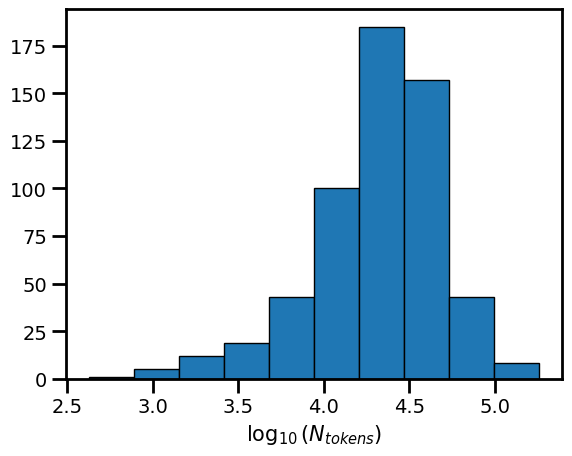

In [38]:
plt.hist(np.log10([tn for tn in token_number if tn>10]), edgecolor='black')
plt.xlabel('$\log_{10}(N_{tokens})$', fontsize=15)
plt.savefig('./NewPlots/N_token_distr.pdf', bbox_inches='tight')
plt.show()